# IMPORT LIBRARIES AND READ DATA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

In [72]:
application_data=pd.read_csv(r'C:\Users\Administrator\Downloads\02 - Python_Python\Student Notebooks/application_data.csv',parse_dates=True)
previous_application=pd.read_csv(r'C:\Users\Administrator\Downloads\02 - Python_Python\Student Notebooks\previous_application.csv')
columns_description = pd.read_excel(r'C:\Users\Administrator\Downloads\02 - Python_Python\Student Notebooks\columns_description.xlsx',skiprows=1)
application_data
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print ("application_data     :",application_data.shape)
print ("previous_application :",previous_application.shape)
print ("columns_description  :",columns_description.shape)

In [ ]:
display("columns_description for both application and previous appication")

display(columns_description)

# FIND PERCENTAGE OF MISSING VALUES AND REMOVE COLUMNS WITH  PERCENTAGE OF MISSING VALUES > 50 % IN PREVIOUS APPLICATION

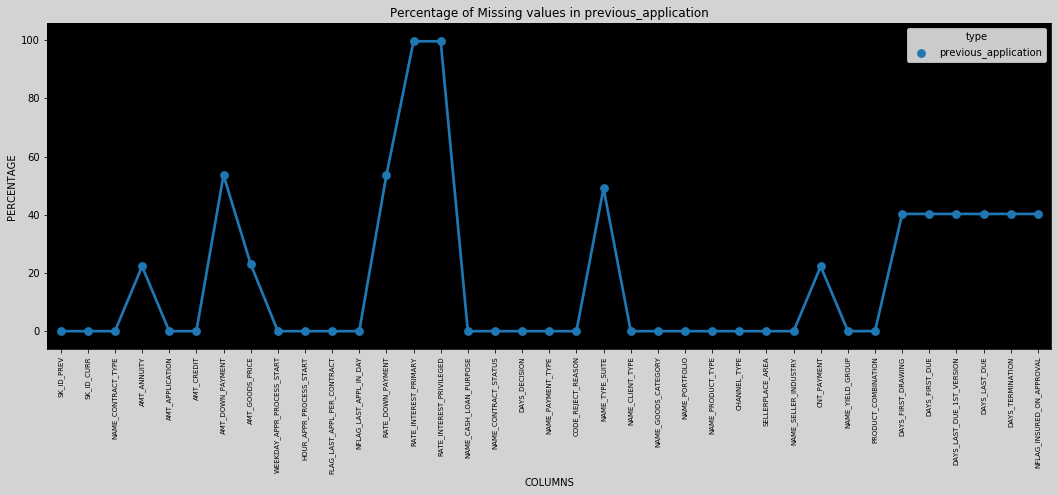

In [6]:
fig = plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"] = "previous_application"
ax = sns.pointplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [7]:
print("Percentage of missing  values in previous application for each column")
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

Percentage of missing  values in previous application for each column


SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [49]:
pd.options.display.max_rows = 4000

In [9]:
print("Removing columns in previous application data for missing values where missing percentage is greater than  50")
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)


Removing columns in previous application data for missing values where missing percentage is greater than  50


# DATA CLEANING- BY REPLACING NAN WITH MEDIAN

In [36]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].fillna(previous_application['NFLAG_INSURED_ON_APPROVAL'].mode(), inplace = True)
previous_application['AMT_ANNUITY'].fillna( 15506.774631, inplace = True)
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mean(), inplace = True)
previous_application['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace = True)
previous_application['CNT_PAYMENT'].fillna(12.00, inplace = True)
previous_application['AMT_CREDIT'].fillna(78970.50 , inplace = True)
previous_application['DAYS_FIRST_DUE'].fillna(-826.000000, inplace = True)

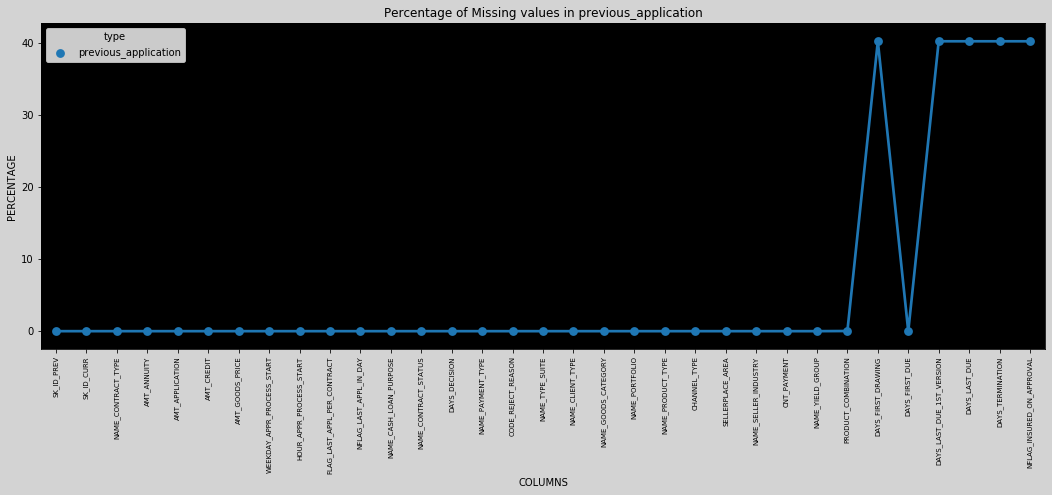

In [37]:
fig = plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"] = "previous_application"
ax = sns.pointplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

# COMBINING DATASET

In [12]:
# Finding Common columns
a = application_data.columns.intersection(previous_application.columns)
 
# Printing common columns
print ("Common Columns:",a)


Common Columns: Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')


In [133]:
complete_application=pd.merge(application_data, previous_application, on='SK_ID_CURR')


# COMBINING REDUNDANT COLUMNS

In [117]:
complete_application['total_document']=complete_application.iloc[:,complete_application.columns.get_loc('FLAG_DOCUMENT_2') : complete_application.columns.get_loc('FLAG_DOCUMENT_21')].sum(axis=1,skipna=True)

In [118]:
complete_application.drop(complete_application.columns[complete_application.columns.get_loc('FLAG_DOCUMENT_2') : complete_application.columns.get_loc('FLAG_DOCUMENT_21')+1],
                       axis = 1,inplace=True,errors='ignore')

# REMOVING UNWANTED COLUMNS BASED ON DOMAIN KNOWLEDGE

In [17]:
import openpyxl
wb = openpyxl.load_workbook(r'C:\Users\Administrator\Downloads\02 - Python_Python\Student Notebooks\columns_description.xlsx', data_only=True)
ws = wb.active
df = pd.DataFrame(columns=['Row'])
dropCols=[]
for row in ws:
    if row[1].fill.start_color.index == "FFFFFF00":
        dropCols.append(row[2].value)

In [119]:
complete_application.drop(dropCols,axis=1,inplace=True,errors='ignore')
len(complete_application.columns)

78

# REMOVE MISSING VALUES IN COMBINED DATASET

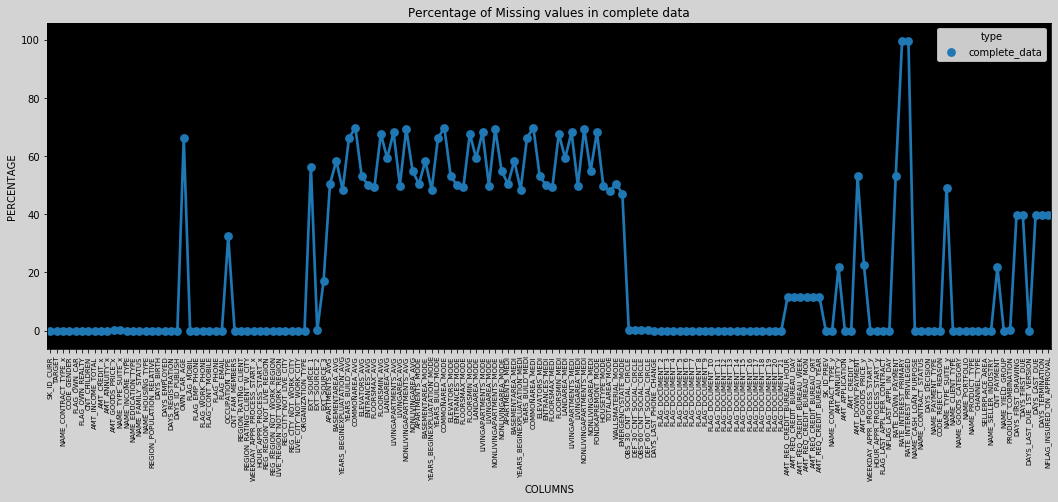

In [134]:

fig = plt.figure(figsize=(18,6))
miss_complete_data = pd.DataFrame((complete_application.isnull().sum())*100/complete_application.shape[0]).reset_index()
miss_complete_data["type"] = "complete_data"
ax = sns.pointplot("index",0,data=miss_complete_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in complete data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [136]:
print("Percentage of missing  values in  combined data for each column")
round(100*(complete_application.isnull().sum()/len(complete_application.index)),2)

Percentage of missing  values in  combined data for each column


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE_x             0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT_x                     0.00
AMT_ANNUITY_x                    0.01
AMT_GOODS_PRICE_x                0.09
NAME_TYPE_SUITE_x                0.25
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     66.29
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [120]:
complete_application=complete_application.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1,errors='ignore')

In [108]:
complete_application['NFLAG_INSURED_ON_APPROVAL'].unique()

array([nan])

In [131]:
complete_application['NFLAG_INSURED_ON_APPROVAL'].fillna((complete_application['NFLAG_INSURED_ON_APPROVAL'].dropna()).mode(), inplace = True)
complete_application['AMT_ANNUITY_y'].fillna( 15506.774631, inplace = True)
complete_application['AMT_GOODS_PRICE_y'].fillna(complete_application['AMT_GOODS_PRICE_y'].mean(), inplace = True)
complete_application['NAME_TYPE_SUITE_y'].fillna('Unaccompanied', inplace = True)
complete_application['AMT_CREDIT_y'].fillna(78970.50 , inplace = True)
complete_application['AMT_ANNUITY_x'].fillna( 15506.774631, inplace = True)
complete_application['AMT_GOODS_PRICE_x'].fillna(complete_application['AMT_GOODS_PRICE_x'].mean(), inplace = True)
complete_application['NAME_TYPE_SUITE_x'].fillna('Unaccompanied', inplace = True)
complete_application['AMT_CREDIT_x'].fillna(78970.50 , inplace = True)
complete_application['CNT_PAYMENT'].fillna(12.00, inplace = True)
complete_application['DAYS_LAST_DUE'].fillna(-826.000000, inplace = True)
complete_application['DAYS_LAST_DUE_1ST_VERSION'].fillna( -368.000000, inplace = True)
complete_application['DAYS_FIRST_DUE'].fillna(complete_application['DAYS_FIRST_DUE'].mean(), inplace = True)
complete_application['RATE_DOWN_PAYMENT'].fillna(complete_application['RATE_DOWN_PAYMENT'].mean(), inplace = True)
complete_application['AMT_DOWN_PAYMENT'].fillna(complete_application['RATE_DOWN_PAYMENT'].mean(), inplace = True)
complete_application['RATE_INTEREST_PRIMARY'].fillna(complete_application['AMT_DOWN_PAYMENT'].mean(), inplace = True)
complete_application['RATE_INTEREST_PRIVILEGED'].fillna(complete_application['RATE_INTEREST_PRIVILEGED'].mean(), inplace = True)
complete_application['DAYS_TERMINATION'].fillna(complete_application['DAYS_TERMINATION'].mean(), inplace = True)

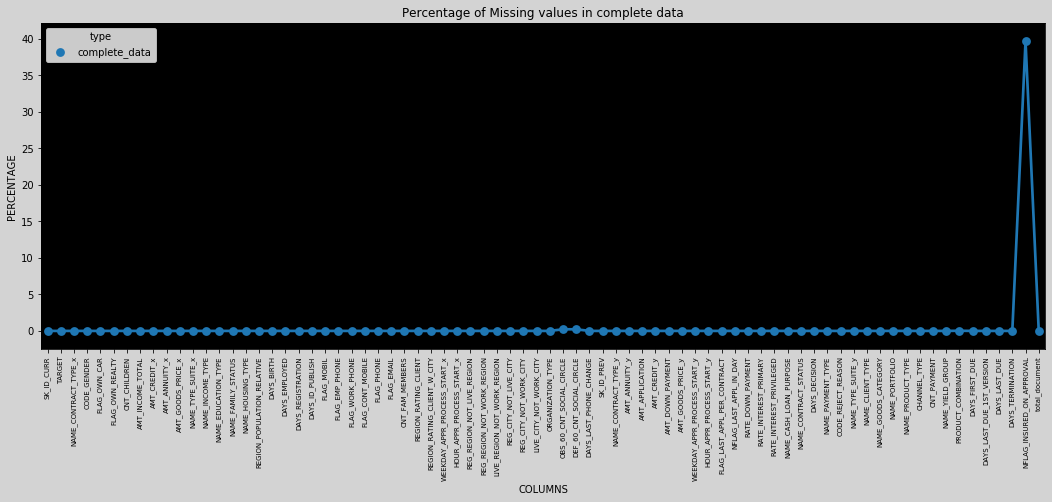

In [132]:
fig = plt.figure(figsize=(18,6))
miss_complete_data = pd.DataFrame((complete_application.isnull().sum())*100/complete_application.shape[0]).reset_index()
miss_complete_data["type"] = "complete_data"
ax = sns.pointplot("index",0,data=miss_complete_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in complete data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [27]:
complete_application['DAYS_BIRTH'] = abs(complete_application['DAYS_BIRTH'])
complete_application['DAYS_ID_PUBLISH'] = abs(complete_application['DAYS_ID_PUBLISH'])
complete_application['DAYS_ID_PUBLISH'] = abs(complete_application['DAYS_ID_PUBLISH'])
complete_application['DAYS_LAST_PHONE_CHANGE'] = abs(complete_application['DAYS_LAST_PHONE_CHANGE'])


# CORRELATION

In [ ]:
complete_application.corr()

# VISUALIZATIONS

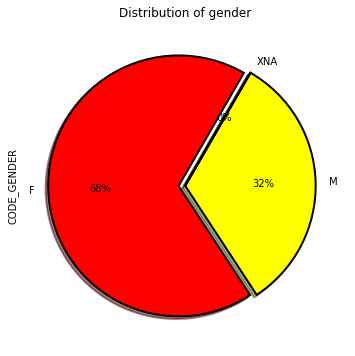

In [56]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
complete_application["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

In [57]:
application_data_x = application_data[[x for x in application_data.columns if x not in ["TARGET"]]]
previous_application_x = previous_application[[x for x in previous_application.columns if x not in ["TARGET"]]]
application_data_x["type"] = "application_data"
previous_application_x["type"] = "previous_application"
data = pd.concat([application_data_x,previous_application_x],axis=0) 

MemoryError: Unable to allocate 152. MiB for an array with shape (65, 307511) and data type float64

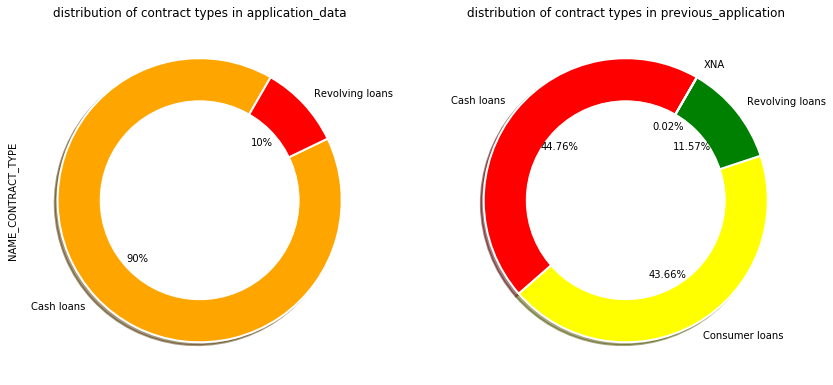

In [59]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in application_data")

plt.subplot(122)
previous_application["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.2f%%",colors = ["red","yellow","green",'BLACK'],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("distribution of contract types in previous_application")
plt.show()

plt.show()

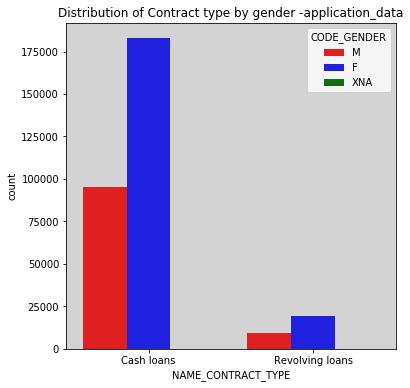

In [62]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=application_data,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender -application_data")


plt.show()

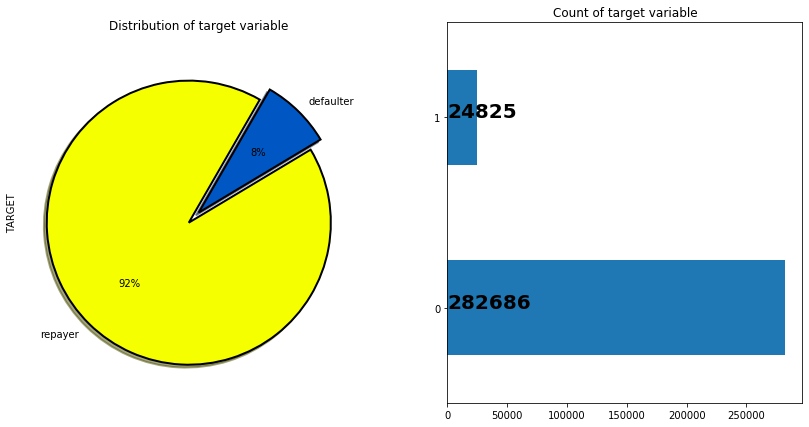

In [38]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()


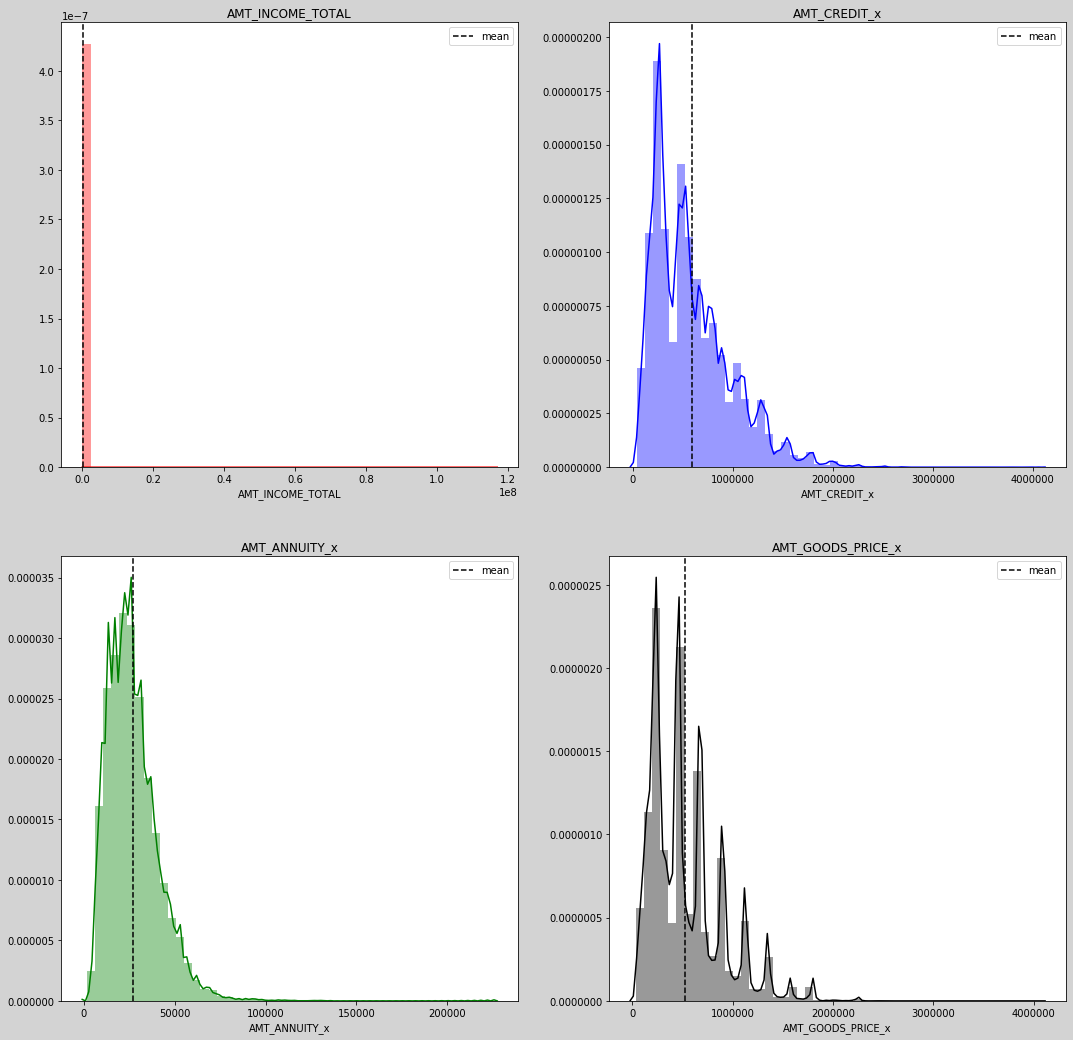

In [70]:

cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x','AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(18,18))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(complete_application[complete_application[i].notnull()][i],color=k)
    plt.axvline(complete_application[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

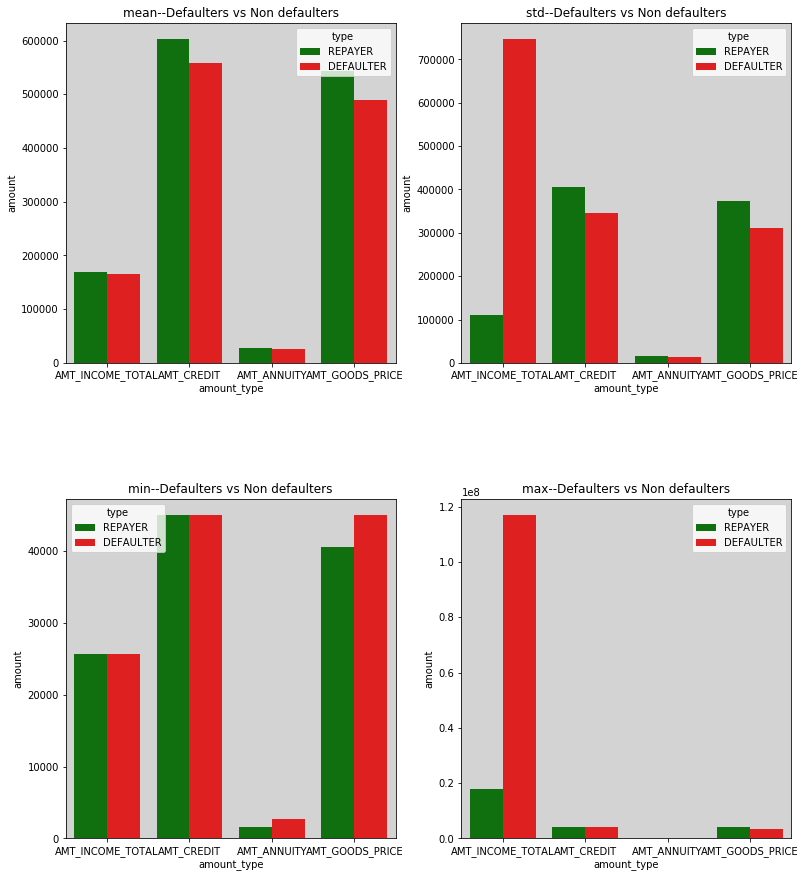

In [71]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
df = application_data.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,15))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    fig.set_facecolor("lightgrey")

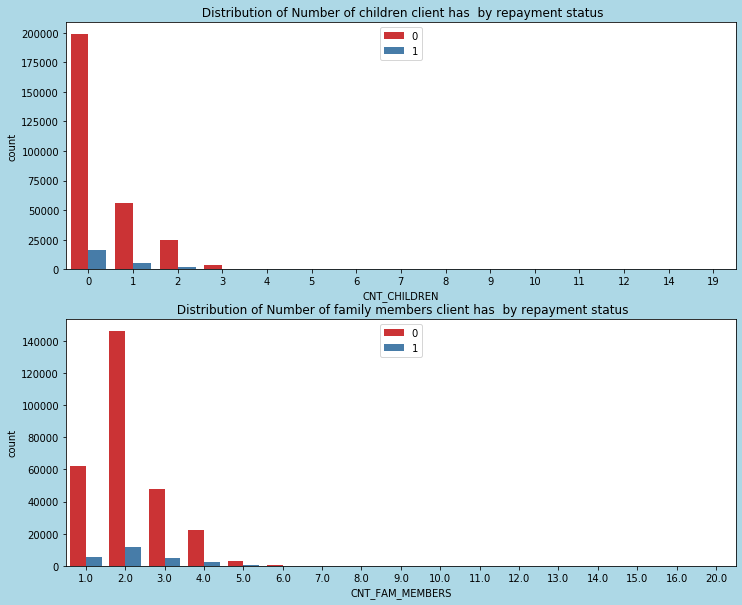

In [64]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(application_data["CNT_CHILDREN"],palette="Set1",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")
plt.subplot(212)
sns.countplot(application_data["CNT_FAM_MEMBERS"],palette="Set1",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")
fig.set_facecolor("lightblue")

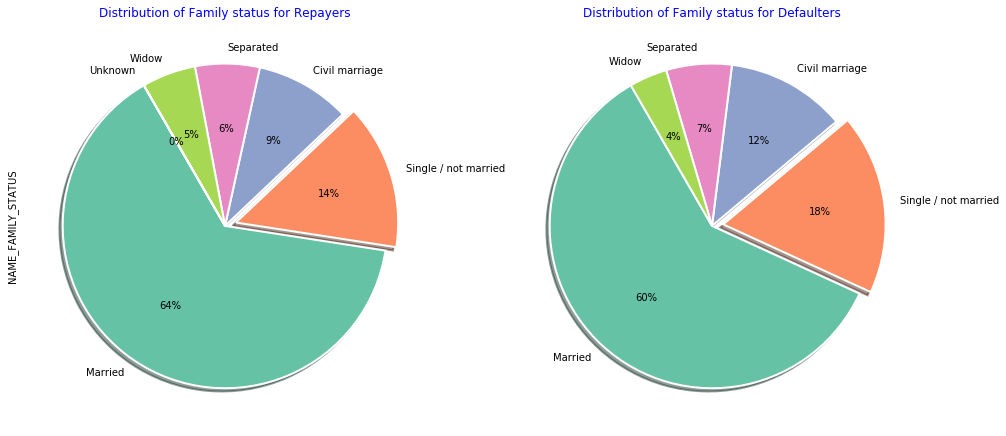

In [73]:
plt.figure(figsize=(16,8))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0,0])

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

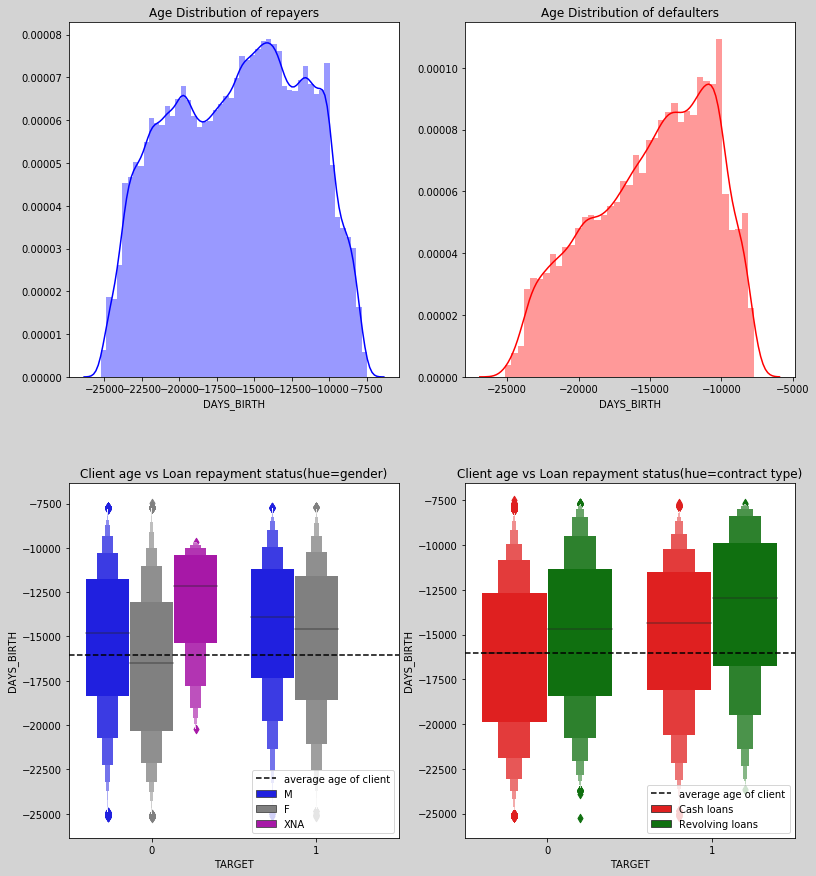

In [74]:
fig = plt.figure(figsize=(13,15))

plt.subplot(221)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_BIRTH"],color="b")
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_BIRTH"],color="r")
plt.title("Age Distribution of defaulters")

plt.subplot(223)
sns.lvplot(application_data["TARGET"],application_data["DAYS_BIRTH"],hue=application_data["CODE_GENDER"],palette=["b","grey","m"])
plt.axhline(application_data["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=gender)")

plt.subplot(224)
sns.lvplot(application_data["TARGET"],application_data["DAYS_BIRTH"],hue=application_data["NAME_CONTRACT_TYPE"],palette=["r","g"])
plt.axhline(application_data["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=contract type)")

plt.subplots_adjust(wspace = .2,hspace = .3)

fig.set_facecolor("lightgrey")

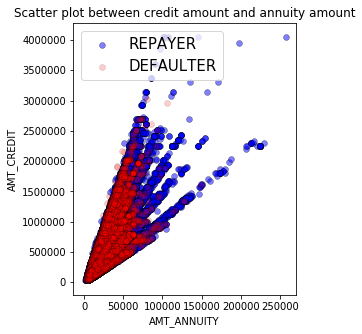

In [68]:
fig = plt.figure(figsize=(12,10))
plt.scatter(application_data[application_data["TARGET"]==0]['AMT_ANNUITY'],application_data[application_data["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(application_data[application_data["TARGET"]==1]['AMT_ANNUITY'],application_data[application_data["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()